# Lecture 12 - Basics of Functions

## Overview, Objectives, and Key Terms
 
With some simple programs under our belts, it is time to *modularize* our programs by using *functions*.  In this lecture and [Lecture 13](ME400_Lecture_13.ipynb), you will learn how to define your own functions to meet a variety of needs. 

### Objectives

By the end of this lesson, you should be able to

- Define a function that accepts (zero or more) input arguments and returns (zero or more) values.
- Explain the meaning of a named and default argument.
- Use *unpacking* to define multiple variable in a single statement.
- Include functions in flowcharts.

### Key Terms

- function
- `def`
- call
- argument
- return value
- unpacking
- named (or keyword) argument
- default value

## What is a Function?

**A function is something that is executed (possibly with input) and provides some sort of output.** 



Let's start by example.  Consider the sum of an array $x$, defined mathematically as $s = \sum^n_{i=1} x_i$ and computed in Python via 

In [2]:
x = [1, 3, 4, 2, 4] 
s = 0
for i in range(len(x)):
    s += x[i]
s

14

This short program is specific to the value of `x` defined.  We need to turn it into a function to handle *any* value of `x`.


```python
def function_name(arg1, arg2, ...):
    # do something to define rval1
    # do something else to define rval2
    # and so on...
    return rval1, rval2, ...
```

Features: `def` keyword, a **function name**, (possible) **arguments**, and (possible) **return values**.


In [3]:
def compute_sum(x):
    s = 0
    for i in range(len(x)):
        s += x[i]
    return s
compute_sum([1, 3, 4, 2, 4])

14

> **Exercise**:  Write a function that determines whether a positive integer `n` is prime.  A prime number is any number divisible only by one and itself.  By definition, one is not considered prime.  The function should return `True` or `False`.

**Don't forget a return value (if one is expected)!**

In [4]:
def compute_sum_wrong(x):
    s = 0
    for i in range(len(x)):
        s += x[i]

In [5]:
compute_sum_wrong([1, 2]) + compute_sum_wrong([3, 4]) # 10?

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

## Functions with Multiple Return Values

In some applications, programs can be simplified by using functions with **multiple return values**.  

In [6]:
def returns_two_values():
    return 1, 2
v = returns_two_values()
v

(1, 2)

That's a `tuple`.  Suppose we need `a` to be 1 and `b` to be 2.  

In [9]:
a = v[0]
b = v[1]
print('a = {1}, b = {0}'.format(b, a)) # <-- numbered substitutions are cool!

a = 1, b = 2


Alternative:

In [12]:
c, d = returns_two_values()
print('a = {1}, b = {0}'.format(d, a)) # <-- numbered substitutions are cool!

a = 1, b = 2


This multiple assignment is called **unpacking**.  Other examples:

In [13]:
a, b = (1, 2) # a and b from tuple
print(a, b)
a, b = [2, 1] # a and b from list
print(a, b)
c, d = b, a   # c and d from b and a
print(c, d)
c, d = d, c   # swap c and d
print(c, d)

1 2
2 1
1 2
2 1


## Functions with Multiple Arguments

There is **no limit to the number of arguments** a Python function can accept. 


Arguments can be made **optional** by providing **default values**.

In [15]:
def foo(x, y, z) :
    print("(x, y, z) = ({:.4f}, {:.4f}, {:.4f})".format(x, y, z))

As defined, one *must* pass three values to `foo` for `x`, `y`, and `z`:

In [16]:
foo(1, 2, 3)

(x, y, z) = (1.0000, 2.0000, 3.0000)


What if there are common values for `y` and `z`?

In [17]:
def foo_with_defaults(x, y = 1.1, z = 2.2):
    print("(x, y, z) = ({:.4f}, {:.4f}, {:.4f})".format(x, y, z))

In [18]:
foo_with_defaults(1, 2, 3)
foo_with_defaults(1, 2)
foo_with_defaults(1)

(x, y, z) = (1.0000, 2.0000, 3.0000)
(x, y, z) = (1.0000, 2.0000, 2.2000)
(x, y, z) = (1.0000, 1.1000, 2.2000)


Arguments can be **named** to override a default value while leaving others unchanged.

In [19]:
foo_with_defaults(1, z=3) 

(x, y, z) = (1.0000, 1.1000, 3.0000)


In [22]:
foo_with_defaults(x=1, y=2, z=3) 
foo_with_defaults(y=2, x=1, z=3) 
foo_with_defaults(y=2, z=3, x=1) 

(x, y, z) = (1.0000, 2.0000, 3.0000)
(x, y, z) = (1.0000, 2.0000, 3.0000)
(x, y, z) = (1.0000, 2.0000, 3.0000)


In [23]:
foo_with_defaults(1, y=2, 3)

SyntaxError: positional argument follows keyword argument (<ipython-input-23-da68ba83312a>, line 1)

## Function Documentation

From the very beginning, the use of internal documentation via `help` has been emphasized.  The value of `help`, however, depends on developers to provide the information displayed.  That responsibility now turns to you, the function writer.  

In [24]:
help(compute_sum)

Help on function compute_sum in module __main__:

compute_sum(x)



In [25]:
def compute_sum_with_docstring(x):
    """Returns the sum of an array x."""
    s = 0
    for i in range(len(x)):
        s += x[i]
    return s

In [26]:
help(compute_sum_with_docstring)

Help on function compute_sum_with_docstring in module __main__:

compute_sum_with_docstring(x)
    Returns the sum of an array x.



In [27]:
def compute_sum_with_verbose_docstring(x):
    """Returns the sum of an array x.
    
    Inputs
         x: sequential type with numerical elements
    
    Returns
         s: the sum of the elements of x
    """
    s = 0
    for i in range(len(x)):
        s += x[i]
    return s

In [28]:
help(compute_sum_with_verbose_docstring)

Help on function compute_sum_with_verbose_docstring in module __main__:

compute_sum_with_verbose_docstring(x)
    Returns the sum of an array x.
    
    Inputs
         x: sequential type with numerical elements
    
    Returns
         s: the sum of the elements of x



**Always include a docstring** (just like **always include axis labels, legends, etc.**)

## Functions and Flowcharts

![Program to compute sum that uses the `compute_sum` function.](img/sum_function_program.png)

## Recap

You should now be able to

- Define a function that accepts (zero or more) input arguments and returns (zero or more) values.
- Explain the meaning of a named and default argument.
- Use *unpacking* to define multiple variable in a single statement.
- Include functions in flowcharts.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
s = """9
16.25
6.5
15
17
14.25
15
14.25
15.5
13.75
16.25
17.75
19
15.5
15.5
17.5
17.5
17.25
14.75
15.25
16.75
9.25
18.75
16.5
8.75
15.5
13.75
15.25
19
13.75
14.5
14.25
14.75
9
17.25
17
15.5
14.25
13
16
16.25
15
18.5
17.75
15.5
18.5
19.75
12
19.75
18.5
17.75
18.75
15.5
14.25
12.5
15.5
8.5
17.25
19
18.5
15.25
14.5
18.5
10.5
14.5
11.5
19.5
16.5
14
18
12.25
8.5
17
9.25
12.75
18.25
7.25
18.5
0
18.75
18.75
19.5
15.5
15.25
17.75
13.5
13.75
20
13
18
17.75
16.25
16.5
14.25
18.5
13.75
18.25
16.5
16.5
14
17.5
18
18.5
18.75
17.5
15.75
15.5
15.25
11.5
19.5
15.5
18.25
18
16.75
19.25
18
16.75
17.75
16""" 
g = np.array(list(map(float, s.split('\n'))))

## Exam 1 

- Rubric online
- Tests handed out now (or in office hours)
- Check that Canvas scores add up (we'll be double checking, too, in both directions)
- Regrade request via email (scan your written part)
- Regrades are of the whole exam

In [38]:
print('  mean = {:6.2f}%'.format(np.mean(g)/20*100))
print('median = {:6.2f}%'.format(np.median(g)/20*100))
print('   max = {:6.2f}%'.format(np.max(g)/20*100))
print('   min = {:6.2f}%'.format(np.min(g[g>0])/20*100))
print(' stdev = {:6.2f}%'.format(np.std(g[:])/20*100))

  mean =  77.77%
median =  80.00%
   max = 100.00%
   min =  32.50%
 stdev =  16.21%


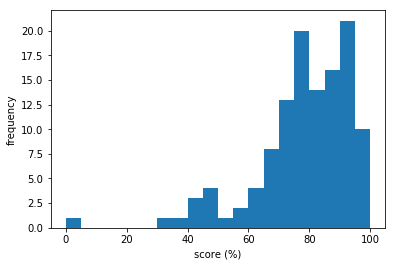

In [55]:
plt.hist(g*5, bins=np.arange(0, 101, 5))
plt.xlabel('score (%)')
plt.ylabel('frequency')
plt.show()